<h2 align=center>Exploratory Data Analysis With Python and Pandas</h2>
<img src="logo.png">

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from ydata_profiling import ProfileReport
# from pandas_profiling import ProfileReport
# import pandas_profiling


Link to data source: https://www.kaggle.com/aungpyaeap/supermarket-sales

**Context**

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

**Data Dictionary**

1. ***Invoice id:*** Computer generated sales slip invoice identification number

2. ***Branch:*** Branch of supercenter (3 branches are available identified by A, B and C).

3. ***City:*** Location of supercenters

4. ***Customer type:*** Type of customers, recorded by Members for customers using member card and Normal for without member card.

5. ***Gender:*** Gender type of customer

6. ***Product line:*** General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

7. ***Unit price:*** Price of each product in USD

8. ***Quantity:*** Number of products purchased by customer

9. ***Tax:*** 5% tax fee for customer buying

10. ***Total:*** Total price including tax

11. ***Date:*** Date of purchase (Record available from January 2019 to March 2019)

12. ***Time:*** Purchase time (10am to 9pm)

13. ***Payment:*** Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

14. ***COGS:*** Cost of goods sold

15. ***Gross margin percentage:*** Gross margin percentage

16. ***Gross income:*** Gross income

17. ***Rating:*** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

### Task 1: Initial Data Exploration

In [2]:
df = pd.read_csv('supermarket_sales.csv')


In [3]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total     Date  \
0       Health and beauty       74.69       7.0  26.1415  548.9715   1/5/19   
1  Electronic accessories       15.28       5.0   3.8200   80.2200   3/8/19   
2      Home and lifestyle       46.33       7.0  16.2155  340.5255   3/3/19   
3       Health and beauty       58.22       8.0  23.2880  489.0480  1/27/19   
4       Sports and travel       86.31       7.0  30.2085  634.3785   2/8/19   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [4]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [5]:
df['Date'] = pd.to_datetime(df.Date)

C:\Users\user\AppData\Local\Temp\ipykernel_14924\242903854.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df.Date)


In [6]:
df.Date.head()

0   2019-01-05
1   2019-03-08
2   2019-03-03
3   2019-01-27
4   2019-02-08
Name: Date, dtype: datetime64[ns]

In [7]:
df.set_index('Date', inplace=True)

In [8]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-05  750-67-8428      A     Yangon        Member  Female   
2019-03-08  226-31-3081      C  Naypyitaw        Normal  Female   
2019-03-03  631-41-3108      A     Yangon        Normal    Male   
2019-01-27  123-19-1176      A     Yangon        Member    Male   
2019-02-08  373-73-7910      A     Yangon        Normal    Male   

                      Product line  Unit price  Quantity   Tax 5%     Total  \
Date                                                                          
2019-01-05       Health and beauty       74.69       7.0  26.1415  548.9715   
2019-03-08  Electronic accessories       15.28       5.0   3.8200   80.2200   
2019-03-03      Home and lifestyle       46.33       7.0  16.2155  340.5255   
2019-01-27       Health and beauty       58.22       8.0  23.2880  489.0480   
2019-02-08       Sports and travel       86.31       7.0  30.2085  634.3785   

             Time      Payment    cogs  gross margin percentage  gross income  \
Date                                                                            
2019-01-05  13:08      Ewallet  522.83                 4.761905       26.1415   
2019-03-08  10:29         Cash   76.40                 4.761905        3.8200   
2019-03-03  13:23  Credit card  324.31                 4.761905       16.2155   
2019-01-27  20:33      Ewallet  465.76                 4.761905       23.2880   
2019-02-08  10:37      Ewallet  604.17                 4.761905       30.2085   

            Rating  
Date                
2019-01-05     9.1  
2019-03-08     9.6  
2019-03-03     7.4  
2019-01-27     8.4  
2019-02-08     5.3

In [9]:
df.describe(include='all')

Invoice ID Branch    City Customer type  Gender         Product line  \
count          1003   1003    1003           924    1003                  960   
unique         1000      3       3             2       2                    6   
top     849-09-3807      A  Yangon        Normal  Female  Fashion accessories   
freq              2    342     342           470     502                  172   
mean            NaN    NaN     NaN           NaN     NaN                  NaN   
std             NaN    NaN     NaN           NaN     NaN                  NaN   
min             NaN    NaN     NaN           NaN     NaN                  NaN   
25%             NaN    NaN     NaN           NaN     NaN                  NaN   
50%             NaN    NaN     NaN           NaN     NaN                  NaN   
75%             NaN    NaN     NaN           NaN     NaN                  NaN   
max             NaN    NaN     NaN           NaN     NaN                  NaN   

        Unit price    Quantity       Tax 5%        Total   Time  Payment  \
count   996.000000  983.000000  1003.000000  1003.000000   1003     1003   
unique         NaN         NaN          NaN          NaN    506        3   
top            NaN         NaN          NaN          NaN  19:48  Ewallet   
freq           NaN         NaN          NaN          NaN      7      346   
mean     55.764568    5.501526    15.400368   323.407726    NaN      NaN   
std      26.510165    2.924673    11.715192   246.019028    NaN      NaN   
min      10.080000    1.000000     0.508500    10.678500    NaN      NaN   
25%      33.125000    3.000000     5.894750   123.789750    NaN      NaN   
50%      55.420000    5.000000    12.096000   254.016000    NaN      NaN   
75%      78.085000    8.000000    22.539500   473.329500    NaN      NaN   
max      99.960000   10.000000    49.650000  1042.650000    NaN      NaN   

               cogs  gross margin percentage  gross income       Rating  
count   1003.000000             1.003000e+03   1003.000000  1003.000000  
unique          NaN                      NaN           NaN          NaN  
top             NaN                      NaN           NaN          NaN  
freq            NaN                      NaN           NaN          NaN  
mean     308.007358             4.761905e+00     15.400368     6.972682  
std      234.303836             6.131488e-14     11.715192     1.717647  
min       10.170000             4.761905e+00      0.508500     4.000000  
25%      117.895000             4.761905e+00      5.894750     5.500000  
50%      241.920000             4.761905e+00     12.096000     7.000000  
75%      450.790000             4.761905e+00     22.539500     8.500000  
max      993.000000             4.761905e+00     49.650000    10.000000

In [10]:
df.shape

(1003, 16)

### Task 2: Univariate Analysis

**Question 1:** What does the distribution of customer ratings looks like? Is it skewed?

C:\Users\user\AppData\Local\Temp\ipykernel_14924\2610285468.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Rating)
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


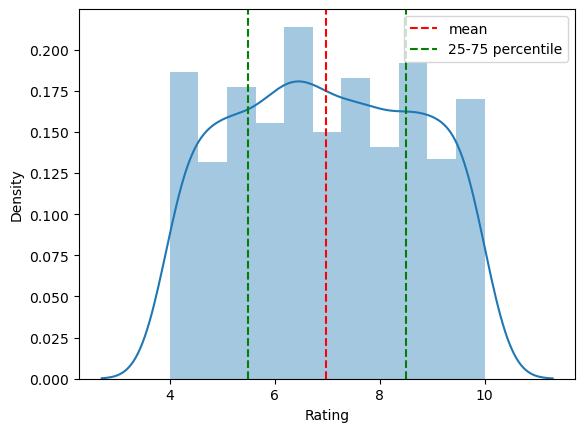

In [11]:
sns.distplot(df.Rating)
plt.axvline(x=np.mean(df.Rating), c= 'red', ls= '--', label= 'mean')
plt.axvline(x=np.percentile(df.Rating, 25), c= 'green', ls= '--', label= '25-75 percentile')
plt.axvline(x=np.percentile(df.Rating, 75), c= 'green', ls= '--')
plt.legend()

array([[<Axes: title={'center': 'Unit price'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Tax 5%'}>],
       [<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'cogs'}>,
        <Axes: title={'center': 'gross margin percentage'}>],
       [<Axes: title={'center': 'gross income'}>,
        <Axes: title={'center': 'Rating'}>, <Axes: >]], dtype=object)

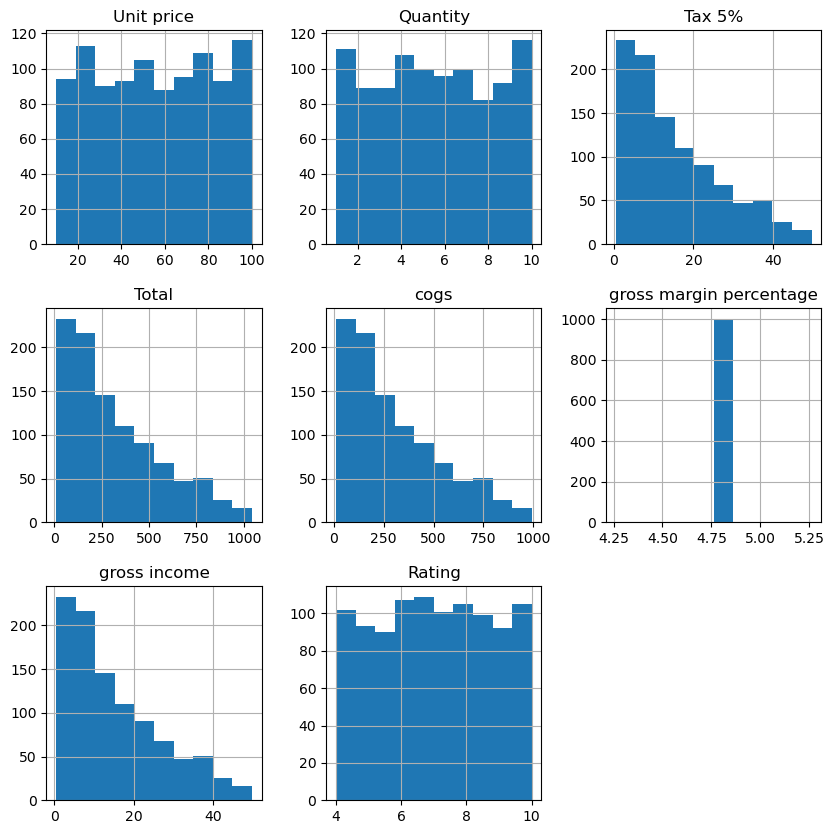

In [12]:
df.hist(figsize=(10,10))

**Question 2:** Do aggregate sales numbers differ by much between branches?

In [13]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

<Axes: xlabel='Branch', ylabel='count'>

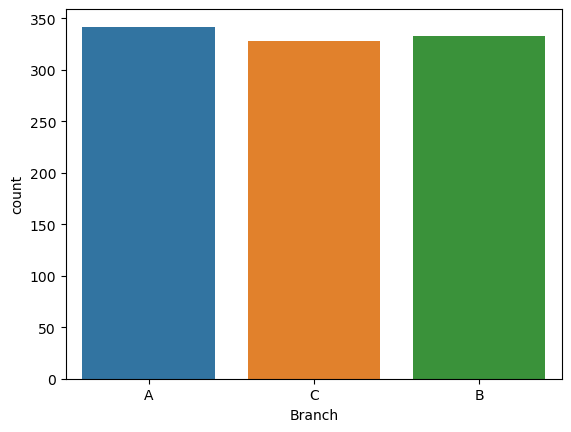

In [14]:
sns.countplot(x=df.Branch)

In [15]:
df.Branch.value_counts()

Branch
A    342
B    333
C    328
Name: count, dtype: int64

<Axes: xlabel='Payment', ylabel='count'>

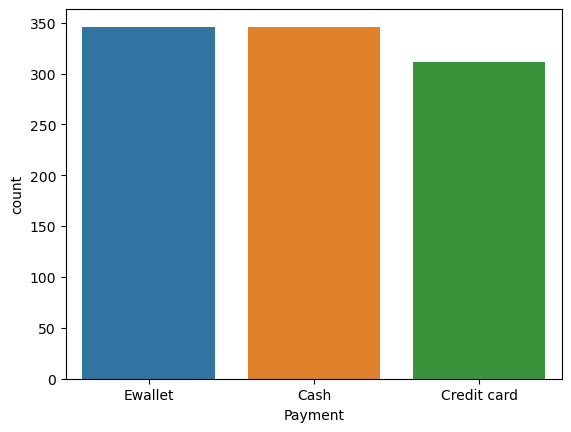

In [16]:
sns.countplot(x= df.Payment)

### Task 3: Bivariate Analysis

**Question 3:** Is there a relationship between gross income and customer ratings?

In [17]:
df['gross income'].corr(df['Rating'])


-0.0385905013394941

<Axes: xlabel='Rating', ylabel='gross income'>

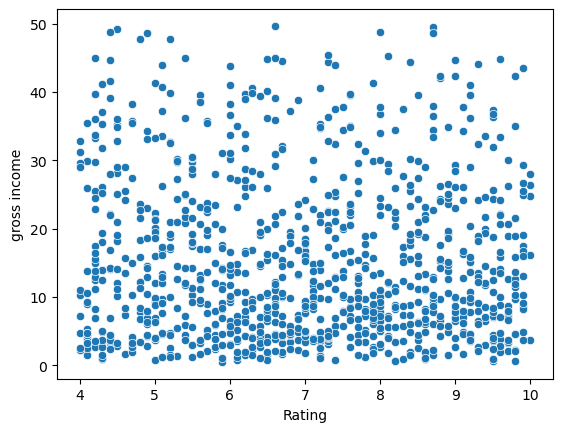

In [18]:
sns.scatterplot(x= df.Rating, y= df['gross income'])

<Axes: xlabel='Rating', ylabel='gross income'>

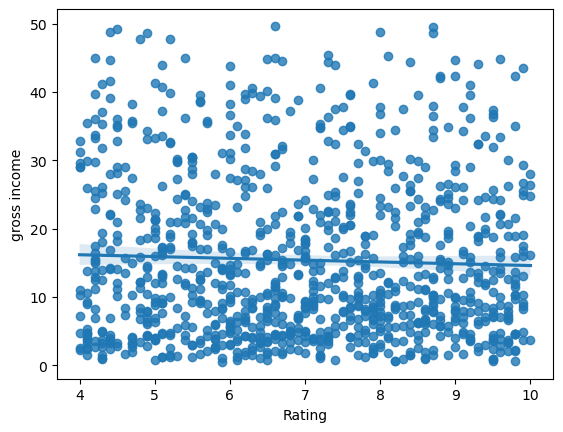

In [19]:
sns.regplot(x= df.Rating, y= df['gross income'])

<Axes: xlabel='Branch', ylabel='gross income'>

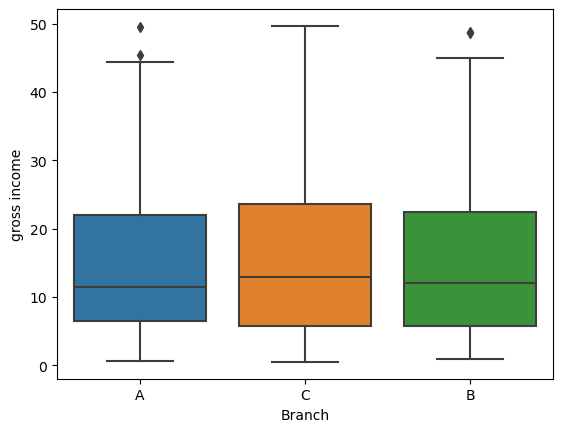

In [20]:
sns.boxplot(x=df.Branch, y= df['gross income'])

<Axes: xlabel='Gender', ylabel='gross income'>

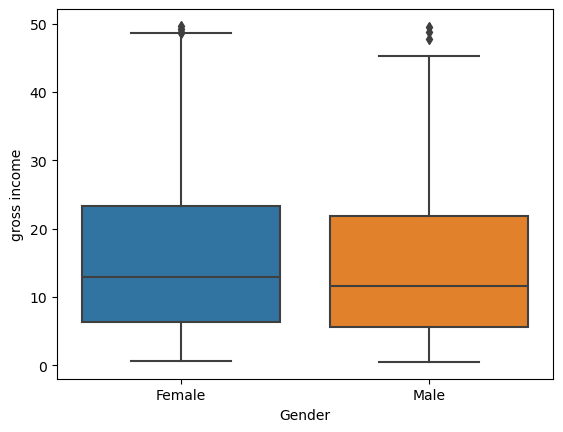

In [21]:
sns.boxplot(x=df.Gender, y= df['gross income'])

In [22]:
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns].corr()


Unit price  Quantity    Tax 5%     Total      cogs  \
Unit price                 1.000000  0.015664  0.634288  0.634288  0.634288   
Quantity                   0.015664  1.000000  0.709165  0.709165  0.709165   
Tax 5%                     0.634288  0.709165  1.000000  1.000000  1.000000   
Total                      0.634288  0.709165  1.000000  1.000000  1.000000   
cogs                       0.634288  0.709165  1.000000  1.000000  1.000000   
gross margin percentage         NaN       NaN       NaN       NaN       NaN   
gross income               0.634288  0.709165  1.000000  1.000000  1.000000   
Rating                    -0.007891 -0.022802 -0.038591 -0.038591 -0.038591   

                         gross margin percentage  gross income    Rating  
Unit price                                   NaN      0.634288 -0.007891  
Quantity                                     NaN      0.709165 -0.022802  
Tax 5%                                       NaN      1.000000 -0.038591  
Total                                        NaN      1.000000 -0.038591  
cogs                                         NaN      1.000000 -0.038591  
gross margin percentage                      NaN           NaN       NaN  
gross income                                 NaN      1.000000 -0.038591  
Rating                                       NaN     -0.038591  1.000000

**Question 4:** Is there a noticeable time trend in gross income?

In [23]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
Date                                                              
2019-01-05  750-67-8428      A     Yangon        Member  Female   
2019-03-08  226-31-3081      C  Naypyitaw        Normal  Female   
2019-03-03  631-41-3108      A     Yangon        Normal    Male   
2019-01-27  123-19-1176      A     Yangon        Member    Male   
2019-02-08  373-73-7910      A     Yangon        Normal    Male   

                      Product line  Unit price  Quantity   Tax 5%     Total  \
Date                                                                          
2019-01-05       Health and beauty       74.69       7.0  26.1415  548.9715   
2019-03-08  Electronic accessories       15.28       5.0   3.8200   80.2200   
2019-03-03      Home and lifestyle       46.33       7.0  16.2155  340.5255   
2019-01-27       Health and beauty       58.22       8.0  23.2880  489.0480   
2019-02-08       Sports and travel       86.31       7.0  30.2085  634.3785   

             Time      Payment    cogs  gross margin percentage  gross income  \
Date                                                                            
2019-01-05  13:08      Ewallet  522.83                 4.761905       26.1415   
2019-03-08  10:29         Cash   76.40                 4.761905        3.8200   
2019-03-03  13:23  Credit card  324.31                 4.761905       16.2155   
2019-01-27  20:33      Ewallet  465.76                 4.761905       23.2880   
2019-02-08  10:37      Ewallet  604.17                 4.761905       30.2085   

            Rating  
Date                
2019-01-05     9.1  
2019-03-08     9.6  
2019-03-03     7.4  
2019-01-27     8.4  
2019-02-08     5.3

In [24]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [25]:
df.groupby(df.index).mean(numeric_only=True)

Unit price  Quantity     Tax 5%       Total        cogs  \
Date                                                                  
2019-01-01   54.995833  6.454545  18.830083  395.431750  376.601667   
2019-01-02   44.635000  6.000000  11.580375  243.187875  231.607500   
2019-01-03   59.457500  4.625000  12.369813  259.766062  247.396250   
2019-01-04   51.743333  5.333333  12.886417  270.614750  257.728333   
2019-01-05   61.636667  4.583333  14.034458  294.723625  280.689167   
...                ...       ...        ...         ...         ...   
2019-03-26   42.972308  4.000000   7.188692  150.962538  143.773846   
2019-03-27   56.841000  4.500000  13.822950  290.281950  276.459000   
2019-03-28   45.525000  4.800000  10.616200  222.940200  212.324000   
2019-03-29   66.346250  6.750000  23.947875  502.905375  478.957500   
2019-03-30   67.408182  5.888889  19.424500  407.914500  388.490000   

            gross margin percentage  gross income    Rating  
Date                                                         
2019-01-01                 4.761905     18.830083  6.583333  
2019-01-02                 4.761905     11.580375  6.050000  
2019-01-03                 4.761905     12.369813  8.112500  
2019-01-04                 4.761905     12.886417  6.516667  
2019-01-05                 4.761905     14.034458  7.433333  
...                             ...           ...       ...  
2019-03-26                 4.761905      7.188692  6.623077  
2019-03-27                 4.761905     13.822950  6.760000  
2019-03-28                 4.761905     10.616200  7.050000  
2019-03-29                 4.761905     23.947875  6.925000  
2019-03-30                 4.761905     19.424500  6.800000  

[89 rows x 8 columns]

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='gross income'>

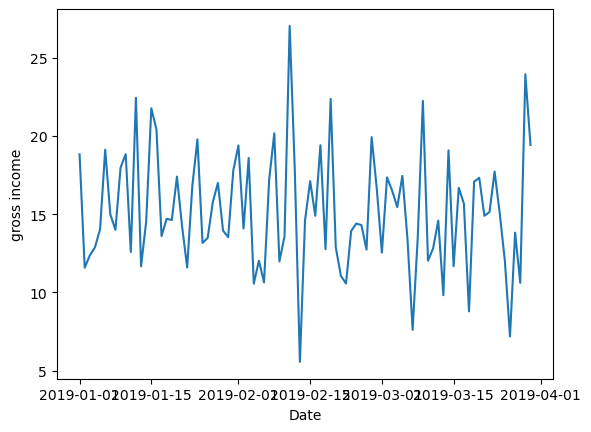

In [26]:
sns.lineplot(x= df.groupby(df.index).mean(numeric_only=True).index, 
             y= df.groupby(df.index).mean(numeric_only=True)['gross income'])

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


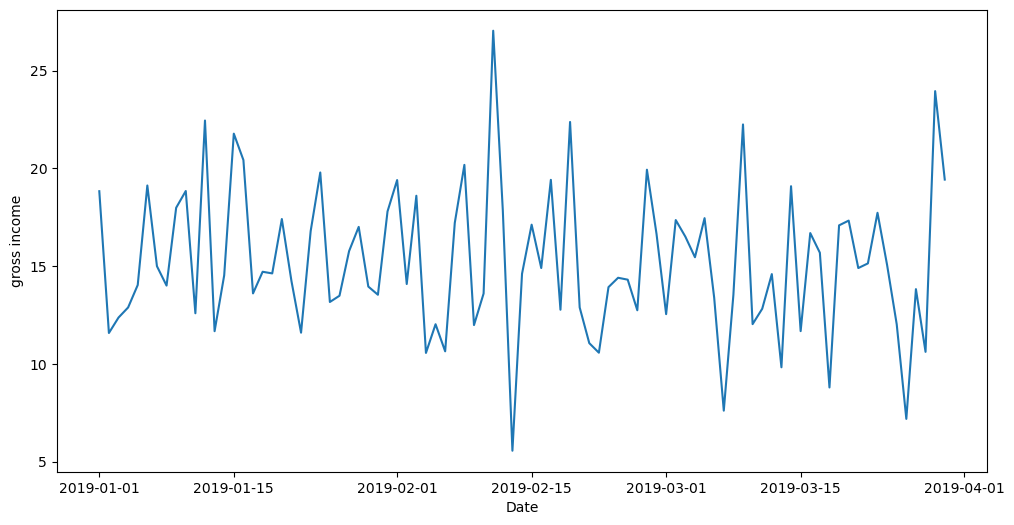

In [27]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.groupby(df.index).mean(numeric_only=True).index, 
             y=df.groupby(df.index).mean(numeric_only=True)['gross income'])
plt.show()

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

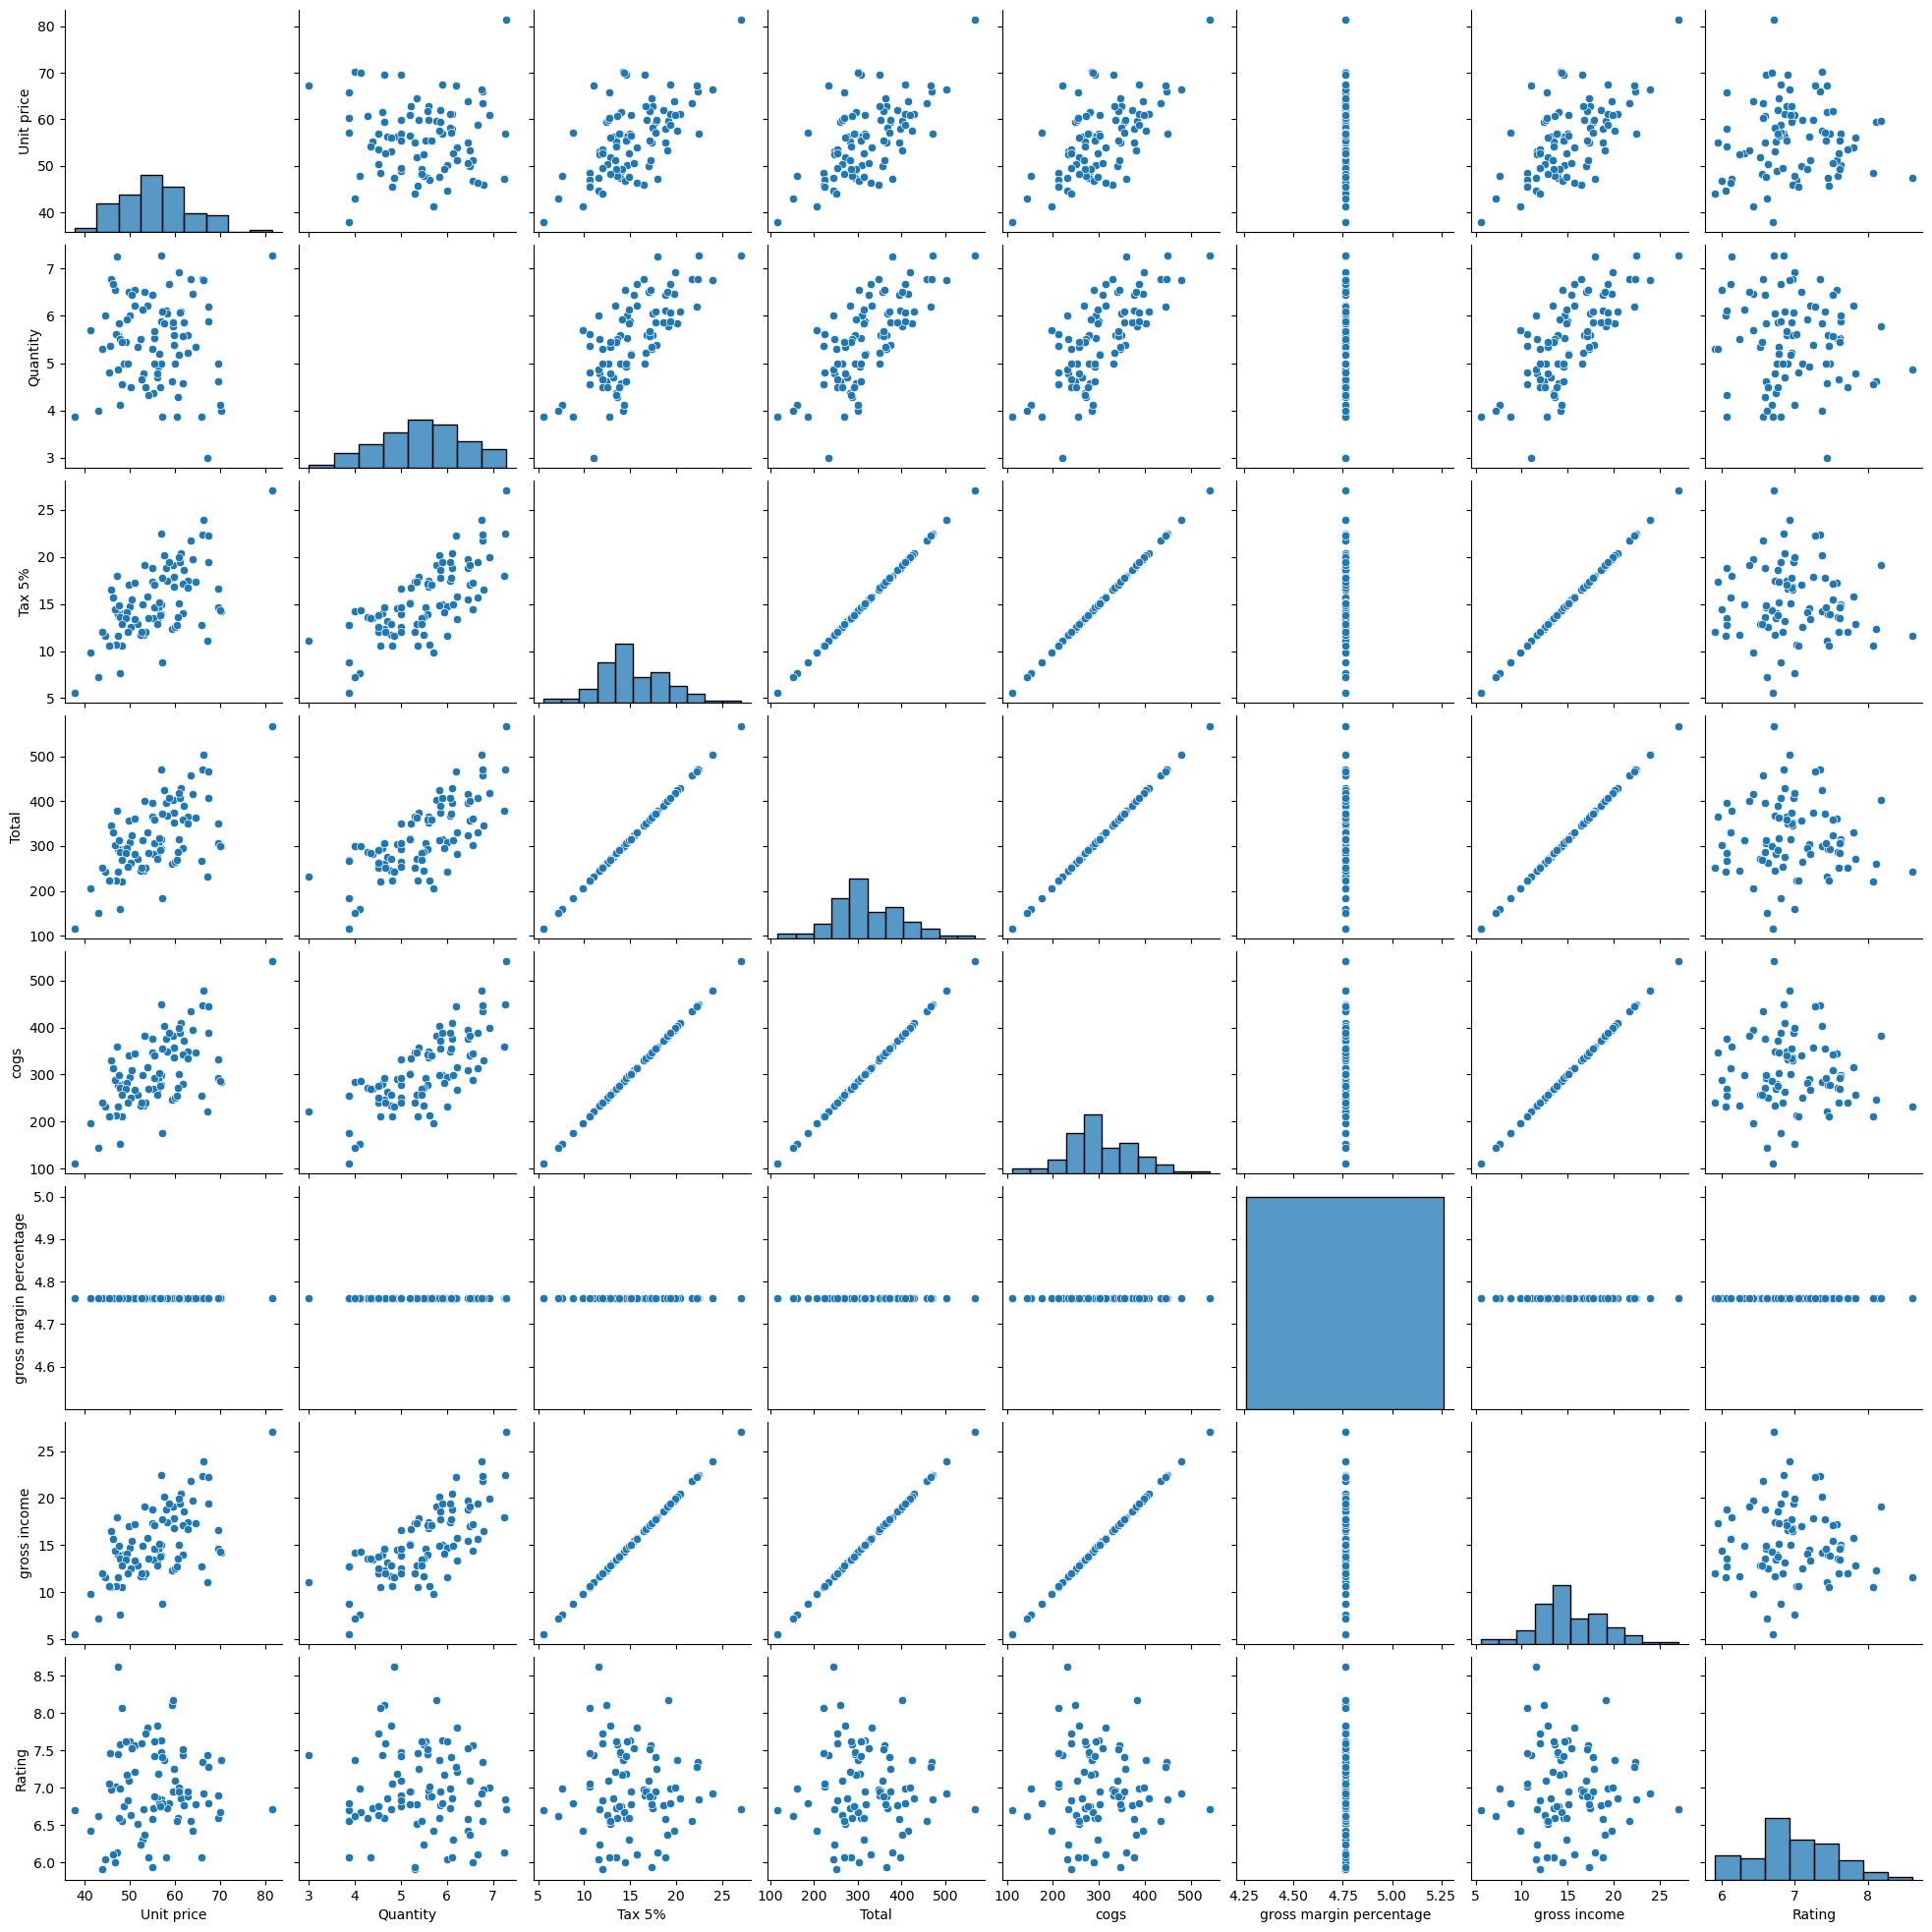

In [30]:
sns.pairplot(df.groupby(df.index).mean(numeric_only=True))

### Task 4: Dealing With Duplicate Rows and Missing Values

In [36]:
df.duplicated()

Date
2019-01-05    False
2019-03-08    False
2019-03-03    False
2019-01-27    False
2019-02-08    False
              ...  
2019-02-22    False
2019-02-18    False
2019-02-18     True
2019-03-10     True
2019-01-26     True
Length: 1003, dtype: bool

In [37]:
df.duplicated().sum()

3

In [38]:
df[df.duplicated()==True]

Invoice ID Branch      City Customer type  Gender  \
Date                                                             
2019-02-18  849-09-3807      A    Yangon        Member  Female   
2019-03-10  745-74-0715      A    Yangon        Normal    Male   
2019-01-26  452-04-8808      B  Mandalay        Normal    Male   

                      Product line  Unit price  Quantity  Tax 5%    Total  \
Date                                                                        
2019-02-18     Fashion accessories       88.34       7.0  30.919  649.299   
2019-03-10  Electronic accessories         NaN       2.0   5.803  121.863   
2019-01-26  Electronic accessories       87.08       NaN  30.478  640.038   

             Time  Payment    cogs  gross margin percentage  gross income  \
Date                                                                        
2019-02-18  13:28     Cash  618.38                 4.761905        30.919   
2019-03-10  20:46  Ewallet  116.06                 4.761905         5.803   
2019-01-26  15:17     Cash  609.56                 4.761905        30.478   

            Rating  
Date                
2019-02-18     6.6  
2019-03-10     8.8  
2019-01-26     5.5

In [39]:
df.drop_duplicates(inplace=True)

In [40]:
df.duplicated().sum()

0

In [41]:
df.isnull().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  6
Quantity                   19
Tax 5%                      0
Total                       0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

In [42]:
df.isnull().sum()/len(df)

Invoice ID                 0.000
Branch                     0.000
City                       0.000
Customer type              0.079
Gender                     0.000
Product line               0.043
Unit price                 0.006
Quantity                   0.019
Tax 5%                     0.000
Total                      0.000
Time                       0.000
Payment                    0.000
cogs                       0.000
gross margin percentage    0.000
gross income               0.000
Rating                     0.000
dtype: float64

<Axes: ylabel='Date'>

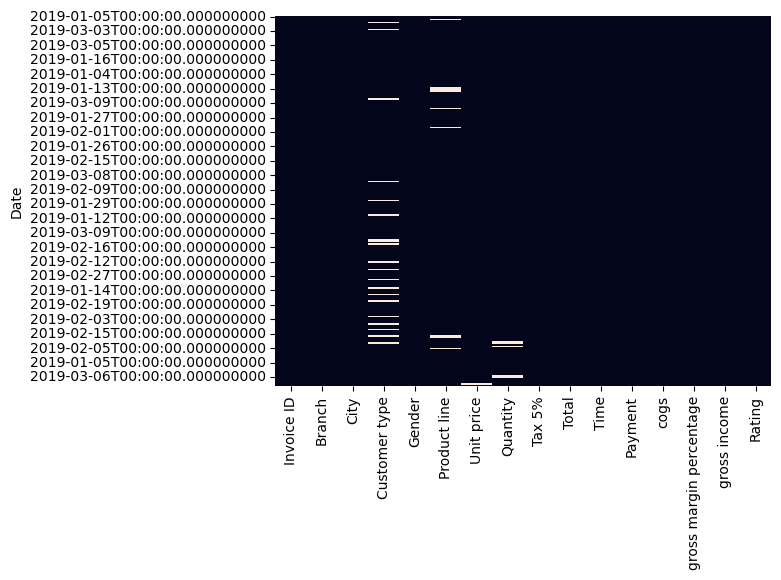

In [48]:
sns.heatmap(df.isnull(), cbar=False)

In [63]:
# df[['Unit price', 'Quantity']].fillna(df[['Unit price', 'Quantity']].mean(), inplace=True)
# df["Unit price"].fillna(df["Unit price"].mean(), inplace=True)

df["Unit price"] = df["Unit price"].fillna(df["Unit price"].mean())
df["Quantity"] = df["Quantity"].fillna(df["Quantity"].mean())

<Axes: ylabel='Date'>

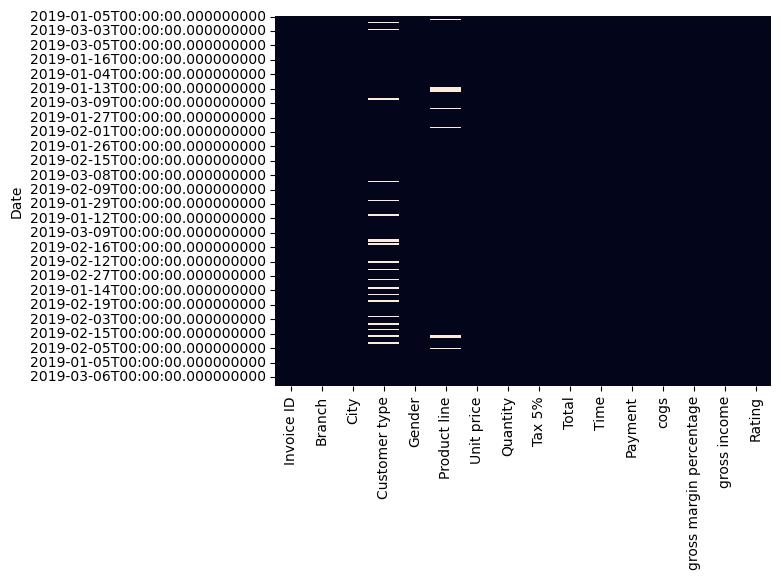

In [67]:
sns.heatmap(df.isnull(), cbar=False)

In [75]:
df.mode().iloc[0]

Invoice ID                         101-17-6199
Branch                                       A
City                                    Yangon
Customer type                           Normal
Gender                                  Female
Product line               Fashion accessories
Unit price                           55.700292
Quantity                                  10.0
Tax 5%                                   4.154
Total                                   87.234
Time                                     14:42
Payment                                Ewallet
cogs                                     83.08
gross margin percentage               4.761905
gross income                             4.154
Rating                                     6.0
Name: 0, dtype: object

In [78]:
df["Customer type"] = df["Customer type"].fillna(df.mode().iloc[0]['Customer type'])
df["Product line"] = df["Product line"].fillna(df.mode().iloc[0]['Product line'])

<Axes: ylabel='Date'>

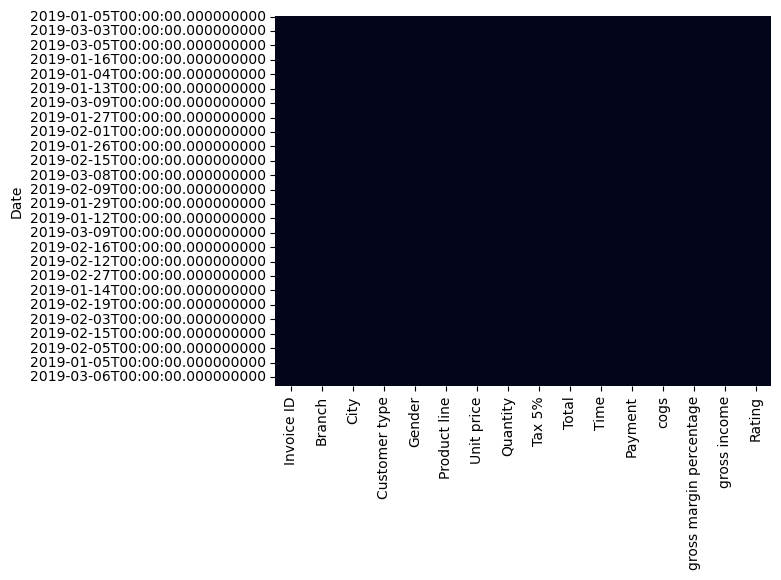

In [79]:
sns.heatmap(df.isnull(), cbar=False)

In [80]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\user\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
c:\Users\user\anaconda3\Lib\site-packages\ydata_profiling\model\missing.py:78: UserWarning: There was an attempt to generate the Heatmap missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Heatmap": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: '--'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

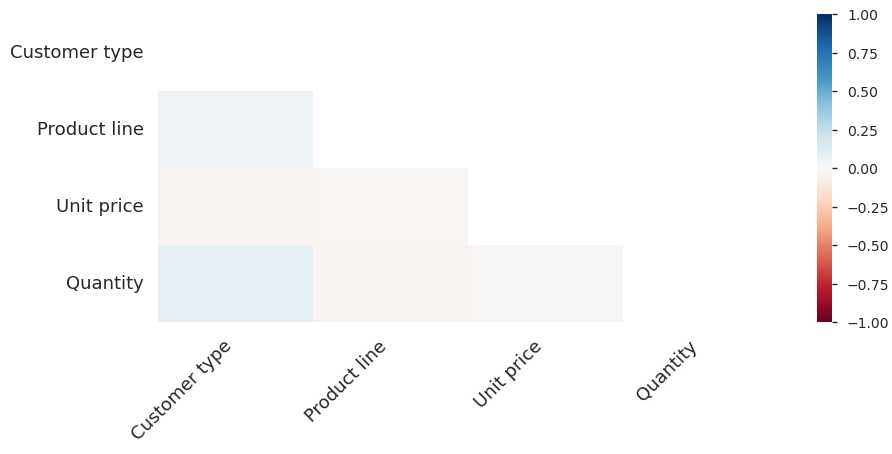

In [82]:
dataset = pd.read_csv('supermarket_sales.csv')
prof = ProfileReport(dataset)
prof.to_file(output_file='supermarket_sales.html')
prof

### Task 5: Correlation Analysis

In [86]:
np.corrcoef(df['gross income'], df['Rating'])

array([[ 1.       , -0.0364417],
       [-0.0364417,  1.       ]])

In [87]:
round(np.corrcoef(df['gross income'], df['Rating'])[1][0], 2)

-0.04

In [90]:
np.round(df[numeric_columns].corr(), 2)

Unit price  Quantity  Tax 5%  Total  cogs  \
Unit price                     1.00      0.01    0.63   0.63  0.63   
Quantity                       0.01      1.00    0.70   0.70  0.70   
Tax 5%                         0.63      0.70    1.00   1.00  1.00   
Total                          0.63      0.70    1.00   1.00  1.00   
cogs                           0.63      0.70    1.00   1.00  1.00   
gross margin percentage         NaN       NaN     NaN    NaN   NaN   
gross income                   0.63      0.70    1.00   1.00  1.00   
Rating                        -0.01     -0.02   -0.04  -0.04 -0.04   

                         gross margin percentage  gross income  Rating  
Unit price                                   NaN          0.63   -0.01  
Quantity                                     NaN          0.70   -0.02  
Tax 5%                                       NaN          1.00   -0.04  
Total                                        NaN          1.00   -0.04  
cogs                                         NaN          1.00   -0.04  
gross margin percentage                      NaN           NaN     NaN  
gross income                                 NaN          1.00   -0.04  
Rating                                       NaN         -0.04    1.00

c:\Users\user\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


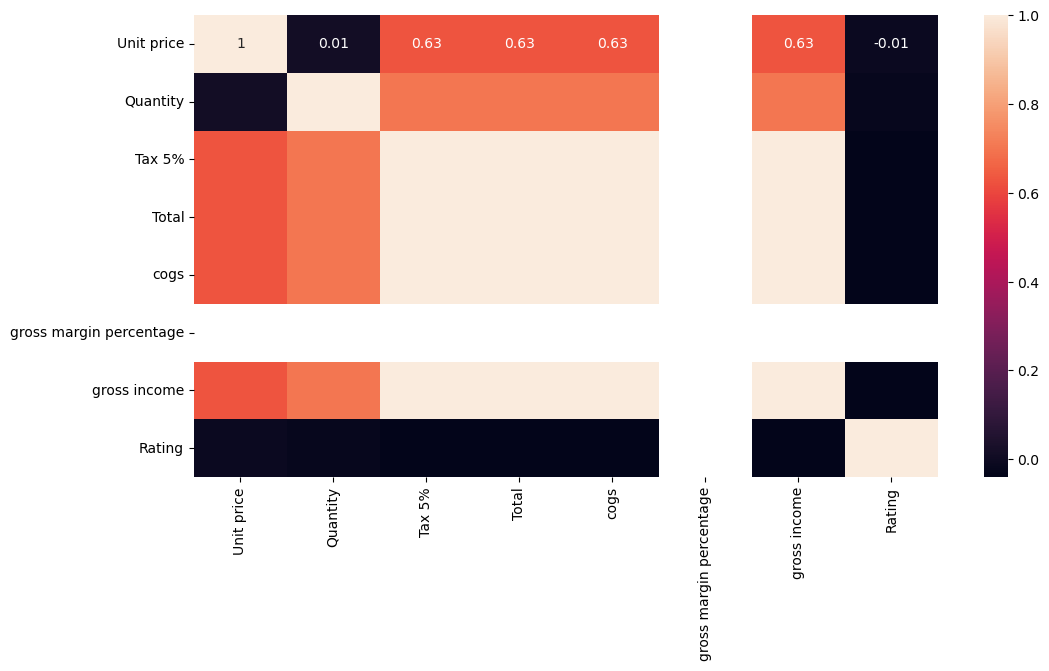

In [96]:
plt.figure(figsize=(12, 6))
sns.heatmap(np.round(df[numeric_columns].corr(), 2), annot= True)
plt.show()

### Helpful Links

1. More visualizations: https://www.data-to-viz.com/
2. Seaborn gallery: https://seaborn.pydata.org/examples/index.html
3. Pandas profiling documentation: https://pypi.org/project/pandas-profiling/